# A lower barrier

In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import palettable as pl
emr = pl.cartocolors.sequential.Emrld_7.get_mpl_colormap()

from quantum_mechanics import WaveFunction
from utils import box_potential

In [8]:
N = 1000 # spatial discretization
Nt = 2000 # temporal discretization
n = np.arange(N) # for n-related stuff
x = np.linspace(0,1, N) # the spatial axis
t = np.linspace(0, 1500, Nt) # temporal axis
dt = t[1]-t[0]
potential_strength = 100

In [9]:
vr_list = np.linspace(-100, 100, 100)

In [10]:
%%time
e0 = []
e1 =[]
for vr in vr_list:
    V = box_potential(N, potential_strength, vr)
    wave =WaveFunction(N, V)
    wave.construct_hamiltonian()
    wave.solve_eigenvalues()
    e0.append(wave.e[0])
    e1.append(wave.e[1])

Wall time: 41.6 s


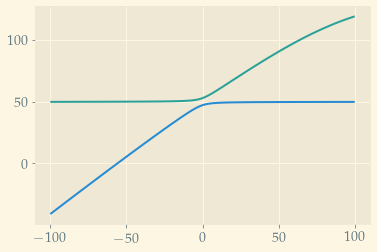

In [11]:
plt.plot(vr_list, e0)
plt.plot(vr_list, e1)

In [12]:
vv = box_potential(N, potential_strength, 0)
%time wf = WaveFunction(N, vv)
%time wf.construct_hamiltonian()
%time wf.solve_eigenvalues()

Wall time: 997 µs
Wall time: 998 µs
Wall time: 418 ms


In [13]:
ep = wf.e[1] - wf.e[0]
ep

5.696213582014231

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


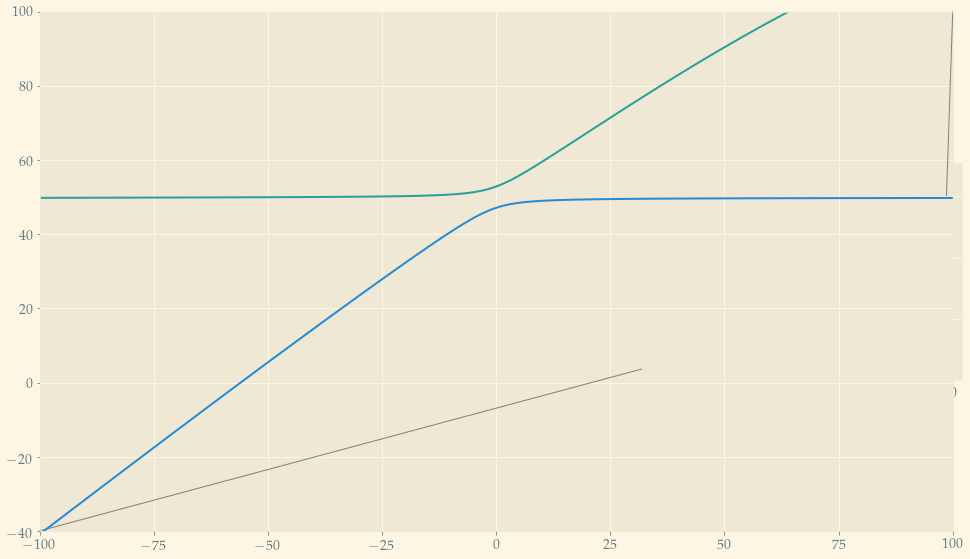

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(vr_list, e0, label = fr"$\lambda_1$")
ax.plot(vr_list, e1, label = fr"$\lambda_2$")
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 3, loc="right")
x1, x2, y1, y2 = -100, 100, -40, 100 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2)
axins.plot(vr_list, e0)
axins.plot(vr_list, e1)
axins.xaxis.set_visible('False')
axins.yaxis.set_visible('False')

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5")

ax.set_xlabel(fr"$\nu_r$", size=20)
ax.set_ylabel(fr"$\bar\lambda$", size=20)
ax.legend()


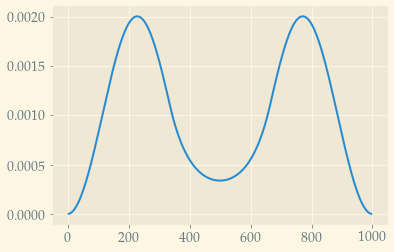

In [15]:
plt.plot(np.abs(wf.v[:,0])**2)

## Two level system
---

In [16]:
from utils import ev_H, two_level_hamiltonian

In [17]:
from numpy.linalg.linalg import eigh

In [18]:
h= two_level_hamiltonian(ep, 0)
e, (g0, e0) = eigh(h)

Wall time: 1 ms
Wall time: 0 ns
Wall time: 390 ms


5.696213582014231

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


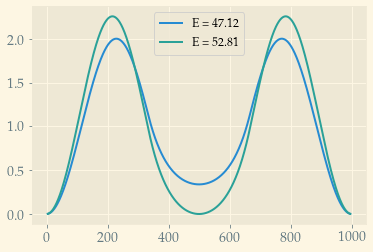

In [19]:
N = 1000
vv = box_potential(N, potential_strength, 0)
%time wf = WaveFunction(N, vv)
%time wf.construct_hamiltonian()
%time wf.solve_eigenvalues()

v1 = np.sqrt(wf.N)*wf.v[:,0]
v2 = np.sqrt(wf.N)*wf.v[:,1]
plt.plot(np.abs(v1)**2, label = f"E = {wf.e[0]:.2f}")
plt.plot(np.abs(v2)**2,  label = f"E = {wf.e[1]:.2f}")
plt.legend(fontsize=12)
ep = wf.e[1]-wf.e[0]
ep

In [20]:
from utils import inner_product

In [21]:
%%time 
H = wf.H.toarray()
tau = []
for v in vr_list:
    op=ev_H(H, v)
    ev = inner_product(op@v2, v1)
    tau.append(ev)

Wall time: 2.61 s


C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


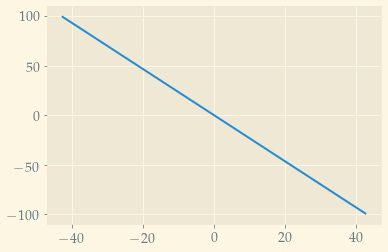

In [22]:
plt.plot(tau, vr_list)

# Interaction picture
---

In [84]:
from utils import two_level_hamiltonian, interaction_hamiltonian, p, two_level_evolve

In [24]:
h =two_level_hamiltonian(ep, 0)

In [25]:
e, (g0,e0) = eigh(h)

In [26]:
hbar=1

In [27]:
from numba import njit

In [149]:
dt = 0.1
N_t = 300
%time psi_t = two_level_evolve(g0, dt, N_t, ep, ep, tau=0.02*ep)

Wall time: 222 ms


(0, 1.4)

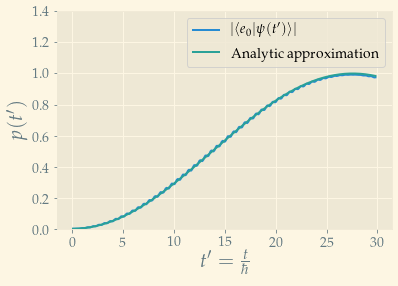

In [150]:
prob =[np.abs(2*inner_product(p, e0))**2 for p in psi_t]
t = np.arange(0,dt*N_t, dt)
plt.figure(figsize=(6, 4))
plt.plot(t, prob, label=fr"$|\langle e_0|\psi(t')\rangle|$")
plt.xlabel(fr"$t' = \frac{{t}}{{\hbar}}$", size =20)
plt.ylabel(fr"$p(t')$", size=20)
plt.plot(t, p(t, 0.02*ep),label=fr"Analytic approximation")
plt.legend(loc=1,fontsize=14)
plt.ylim(0, 1.4)

## Other omega

In [144]:
dt = 0.1
N_t = 300
omega = 1.02*ep
%time psi_t_1 = two_level_evolve(g0, dt, N_t, ep, omega, tau=0.02*ep)
%time psi_t_2 = two_level_evolve(g0, dt, N_t, ep, ep, tau=0.03*ep)

Wall time: 228 ms
Wall time: 217 ms


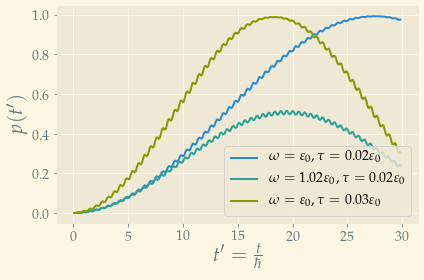

In [162]:
prob_1 =[np.abs(2*inner_product(p, e0))**2 for p in psi_t_1]
prob_2 =[np.abs(2*inner_product(p, e0))**2 for p in psi_t_2]
t = np.arange(0,dt*N_t, dt)

fig=plt.figure(figsize=(6, 4))

plt.plot(t, prob,  label=fr"$\omega = \varepsilon_0, \tau = 0.02\varepsilon_0$")
plt.plot(t, prob_1, label=fr"$\omega = 1.02\varepsilon_0, \tau = 0.02\varepsilon_0$")
plt.plot(t, prob_2,label=fr"$\omega = \varepsilon_0, \tau = 0.03\varepsilon_0$")

plt.xlabel(fr"$t' = \frac{{t}}{{\hbar}}$", size =20)
plt.ylabel(fr"$p(t')$", size=20)
# plt.plot(t, p(t, 0.02*ep),label=fr"Analytic")
plt.legend(fontsize=14)
# plt.ylim(0, 1.4)
fig.tight_layout()
plt.savefig("report/img/stuff.pdf", facecolor=fig.get_facecolor())